### PROJETO TRANSFER LEARNING - DIO - KERAS

In [11]:
from zipfile import ZipFile
file = 'ActorImages.zip'
z = ZipFile(file, 'r')
z.extractall()
z.close()

- #### Foi utilizado fotos dos atores apartir do site - https://www.gettyimages.com.br/fotos/-adam-sandler?assettype=image&family=editorial&phrase=%20Adam%20Sandler&sort=mostpopular, com pouca qtd apenas para testes.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#from keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img
import os
import tqdm
import random

##### Separando as categorias dos atores.

In [13]:
input_path = []
label = []

for clas in os.listdir("ActorImages"):
  for path in os.listdir("ActorImages/"+ clas):
    if clas == "Adam_Sandler":
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join("ActorImages", clas, path))

In [14]:
print(input_path[0], label[0])

ActorImages\Adam_Sandler\0.jpg 0


In [15]:
len(label)

42

##### Convertendo em um dataframe.

In [16]:
df = pd.DataFrame()
df["image"] = input_path
df["label"] = label

In [17]:
df.head()

image  label
0   ActorImages\Adam_Sandler\0.jpg      0
1   ActorImages\Adam_Sandler\1.jpg      0
2  ActorImages\Adam_Sandler\10.jpg      0
3  ActorImages\Adam_Sandler\11.jpg      0
4  ActorImages\Adam_Sandler\12.png      0

##### Capturando amostra.

In [18]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

image  label
0   ActorImages\Adam_Sandler\3.jpg      0
1   ActorImages\Adam_Sandler\9.jpg      0
2  ActorImages\Adam_Sandler\11.jpg      0
3    ActorImages\Jim_Carrey\16.jpg      1
4    ActorImages\Jim_Carrey\15.jpg      1

##### Plotando as imagens do ator 1.

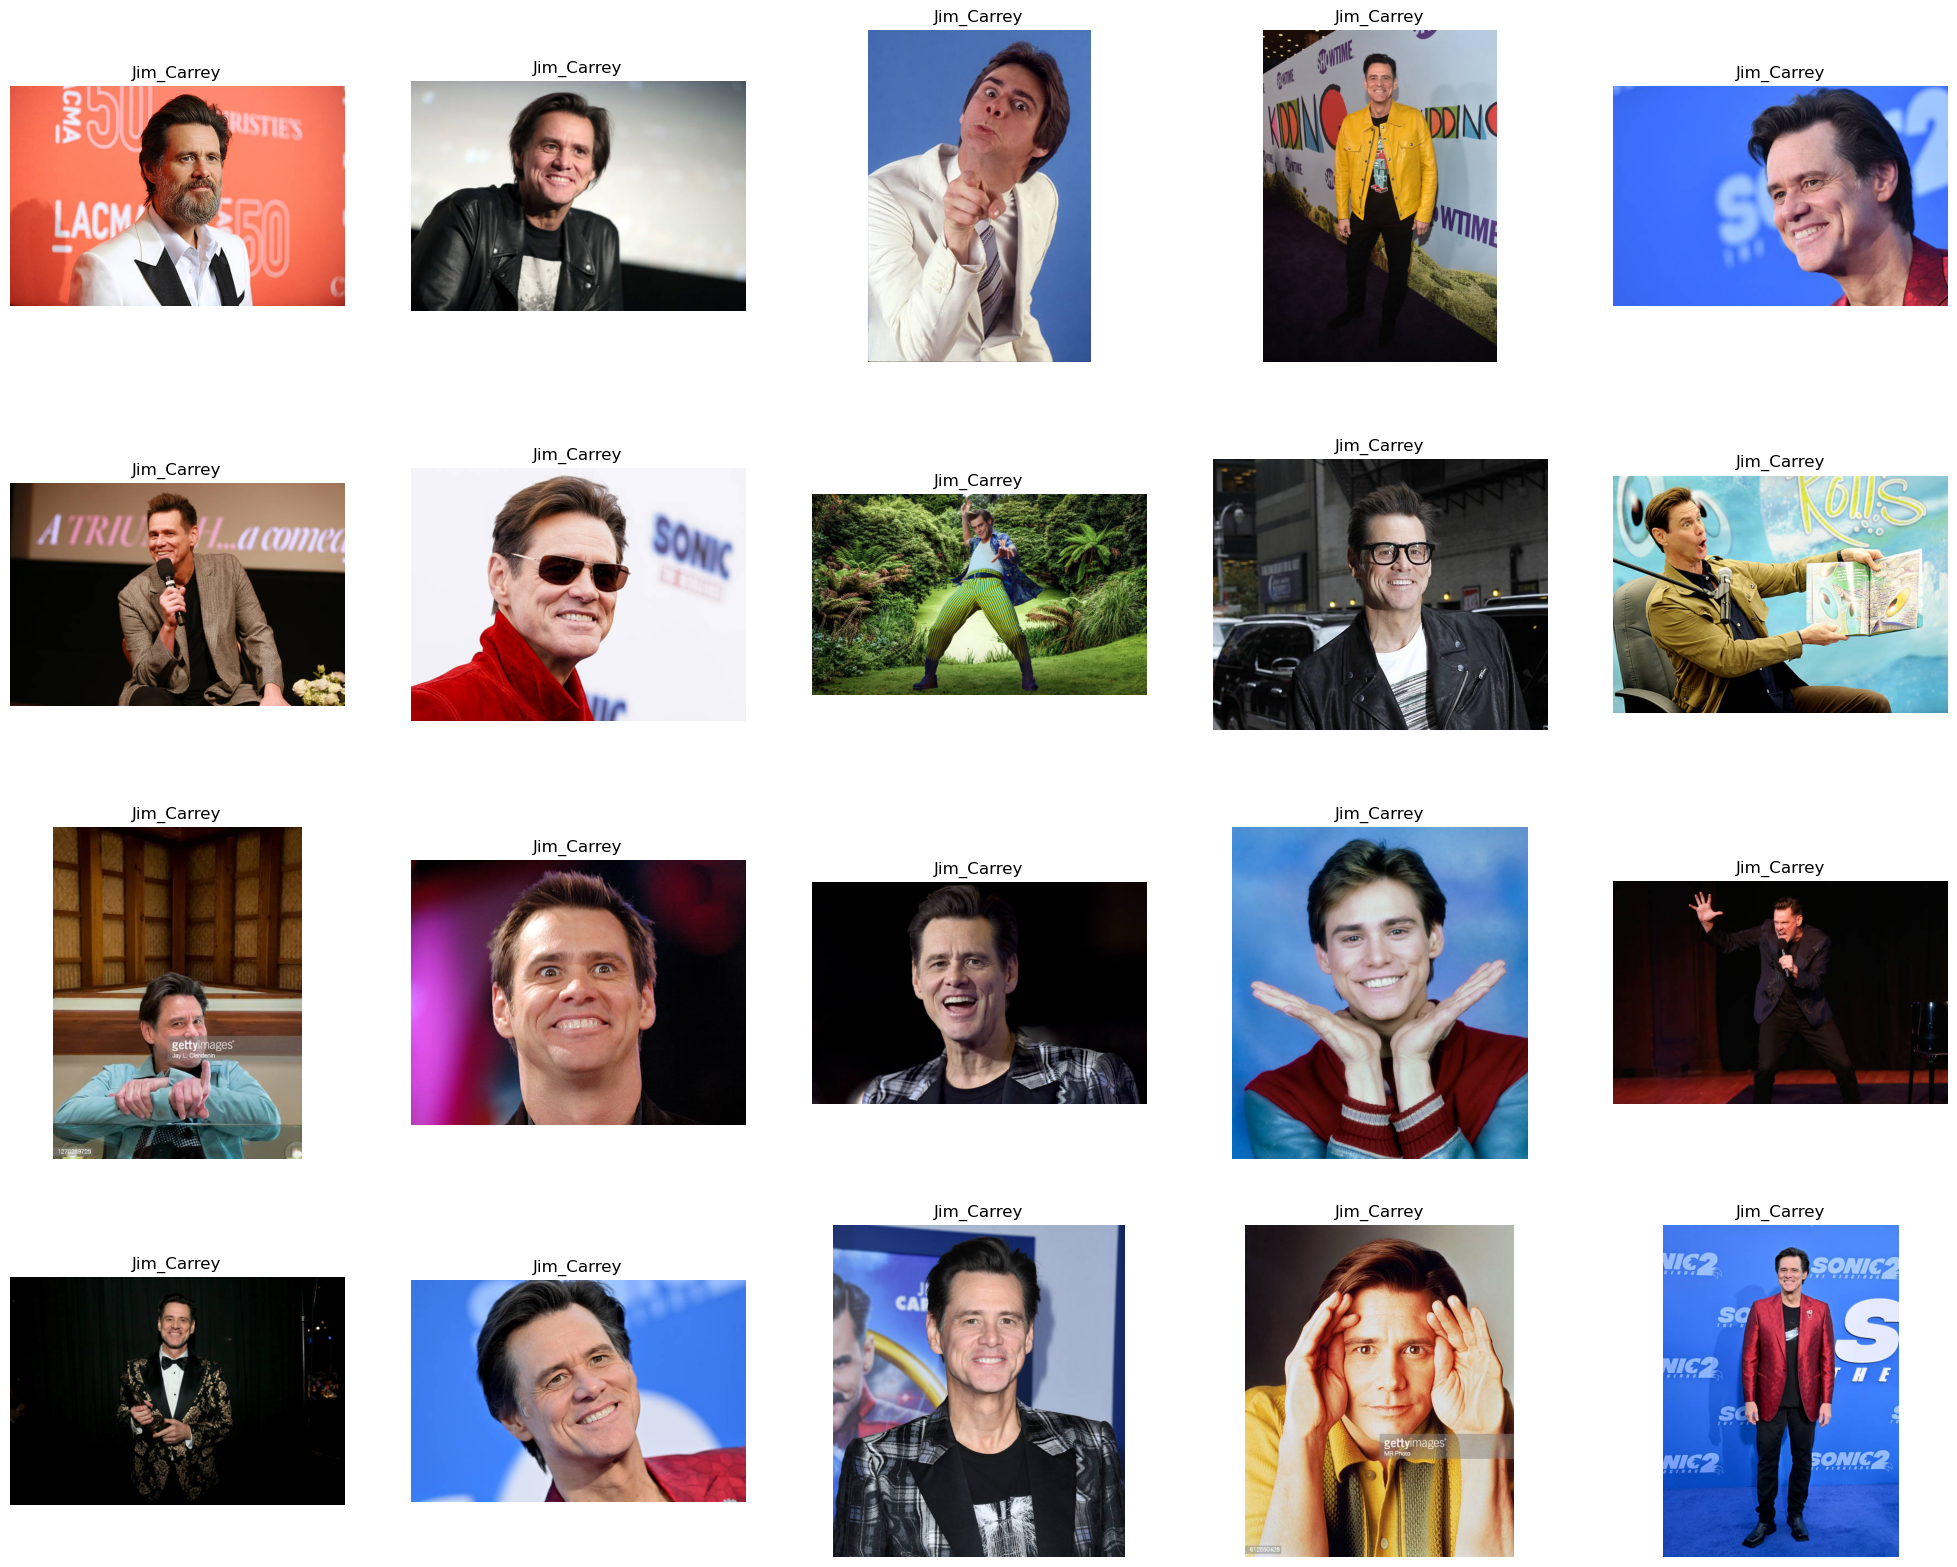

In [20]:
plt.figure(figsize=(25,25))
temp = df[df["label"] == 1]["image"]
start = random.randint(0,len(temp))
files = temp[start:start + 25]
for index, file in enumerate(files):
  plt.subplot(5,5,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title("Jim_Carrey")
  plt.axis("off")

##### Plotando as imagens do ator 2.

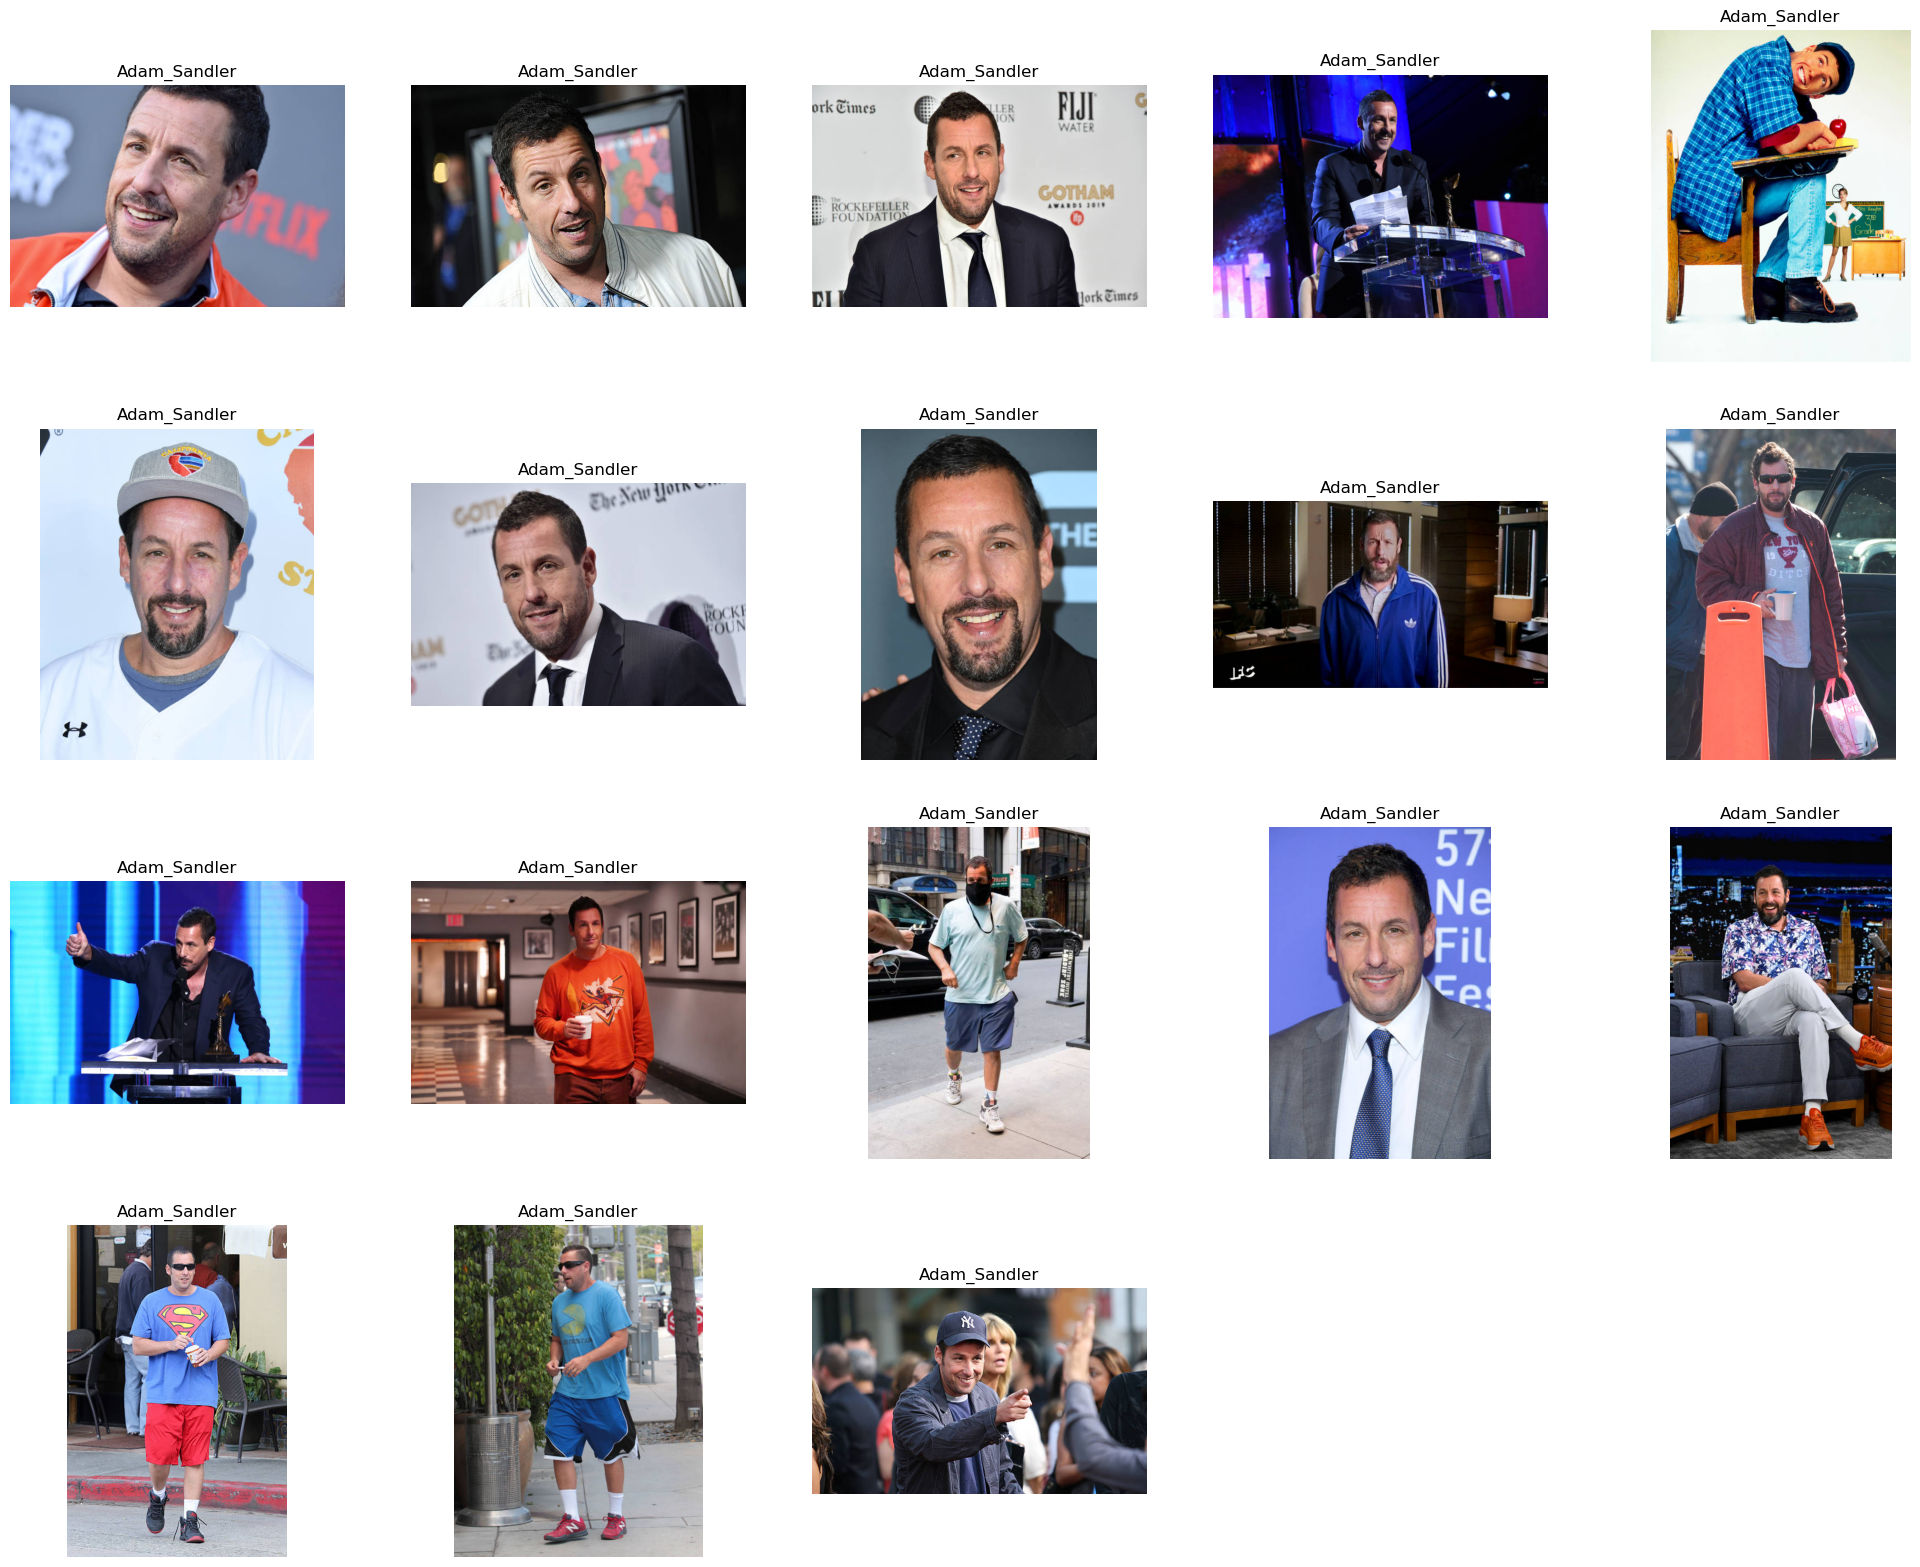

In [22]:
plt.figure(figsize=(25,25))
temp = df[df["label"] == 0]["image"]
start = random.randint(0,len(temp))
files = temp[start:start + 25]
for index, file in enumerate(files):
  plt.subplot(5,5,index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title("Adam_Sandler")
  plt.axis("off")

##### Verificando a distribuição das classes e balanceamento.

<AxesSubplot:xlabel='label', ylabel='count'>

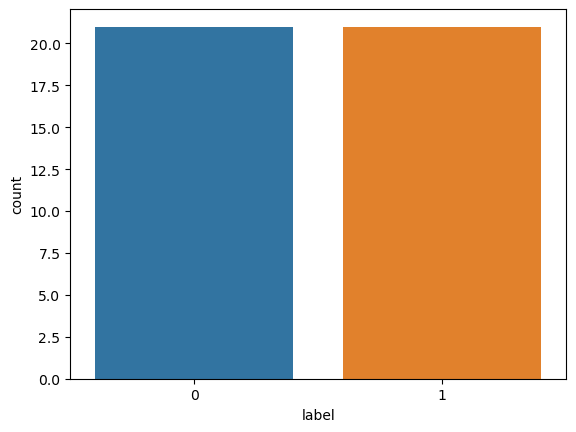

In [23]:
import seaborn as sns
sns.countplot(df["label"])

In [24]:
df['label'] = df['label'].astype('str')

##### Verificando se todas as imagens são do tipo .jpg se tiver outro formado muda para jpg

In [74]:
for i in df['image']:
  if '.jpg' not in i:
    print(i)
    arquivo, extensao = os.path.splitext(i)
    os.rename(i, arquivo+".jpg")

ActorImages\Adam_Sandler\12.png


In [75]:
import PIL
l = []
for image in df['image']:
  try:
    img = PIL.Image.open(image)
  except:
    l.append(image)
l

['ActorImages\\Adam_Sandler\\12.png']

In [76]:
df = df[df['image'] != 'ActorImages/Adam_Sandler/Thumbs.db']
df = df[df['image'] != 'ActorImages/Jim_Carrey/Thumbs.db']
df = df[df['image'] != 'ActorImages/Adam_Sandler/666.jpg']
df = df[df['image'] != 'ActorImages/Jim_Carrey/11702.jpg']

In [28]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, random_state=42)

**Argumentação dos Dados**

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
      )

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        train,
        x_col = 'image',
        y_col = 'label', 
        target_size=(256,256),  
        batch_size=64,
        class_mode='binary'
        )

val_generator = val_datagen.flow_from_dataframe(
        test,
        x_col = 'image',
        y_col = 'label', 
        target_size=(256,256),  
        batch_size=64,
        class_mode='binary'
        )

Found 17 validated image filenames belonging to 2 classes.
Found 5 validated image filenames belonging to 2 classes.


### **Criação** **do Modelo**

In [29]:
from keras import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten

In [30]:
model = Sequential([
    Conv2D(16, (3,3), activation = 'relu', input_shape = (256,256,3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
  ])

model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [31]:
history = model.fit(
      train_generator,  
      epochs=20,
      validation_data=val_generator,  
      )

Epoch 1/20
1/1 [==============================] - 3s 3s/step - loss: 0.6973 - accuracy: 0.4706 - val_loss: 1.1267 - val_accuracy: 0.4000
Epoch 2/20
1/1 [==============================] - 1s 1s/step - loss: 0.8783 - accuracy: 0.5294 - val_loss: 0.6634 - val_accuracy: 0.6000
Epoch 3/20
1/1 [==============================] - 1s 1s/step - loss: 0.9267 - accuracy: 0.4706 - val_loss: 0.6470 - val_accuracy: 0.6000
Epoch 4/20
1/1 [==============================] - 1s 1s/step - loss: 0.7136 - accuracy: 0.4706 - val_loss: 0.6976 - val_accuracy: 0.4000
Epoch 5/20
1/1 [==============================] - 1s 1s/step - loss: 0.6866 - accuracy: 0.5294 - val_loss: 0.7306 - val_accuracy: 0.4000
Epoch 6/20
1/1 [==============================] - 1s 1s/step - loss: 0.6870 - accuracy: 0.5294 - val_loss: 0.7527 - val_accuracy: 0.4000
Epoch 7/20
1/1 [==============================] - 1s 1s/step - loss: 0.6794 - accuracy: 0.5294 - val_loss: 0.7444 - val_accuracy: 0.4000
Epoch 8/20
1/1 [=========================

**Visualização dos Resultados**

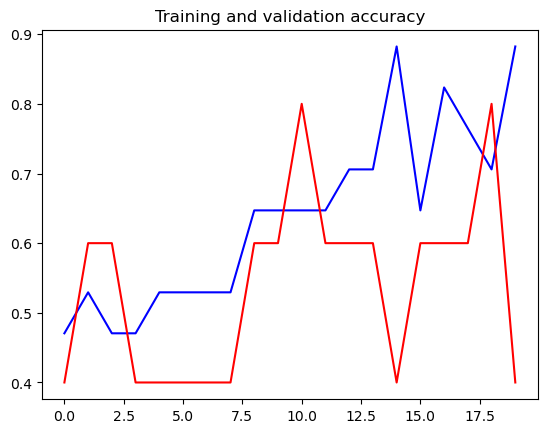

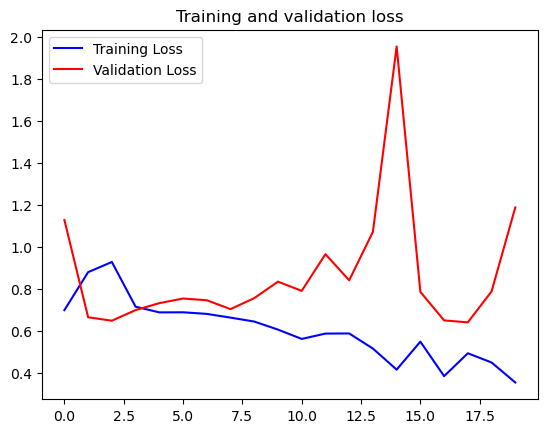

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()